In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# dataset: https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling
data = pd.read_csv('user_knowledge_level.csv', header=None)
data.head()

,0,1,2,3,4,5
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [3]:
data[5] = data[5].astype('category')
data[5] = data[5].cat.codes

data.head()

,0,1,2,3,4,5
0,0.00,0.00,0.00,0.00,0.00,4
1,0.08,0.08,0.10,0.24,0.90,0
2,0.06,0.06,0.05,0.25,0.33,1
3,0.10,0.10,0.15,0.65,0.30,2
4,0.08,0.08,0.08,0.98,0.24,1


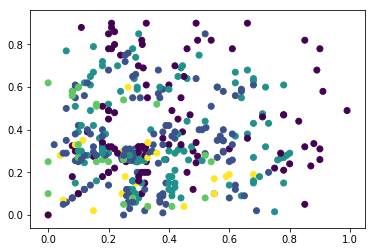

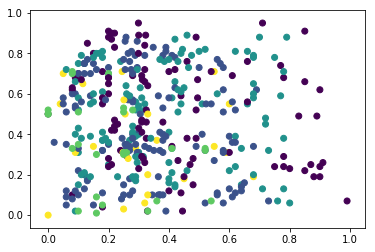

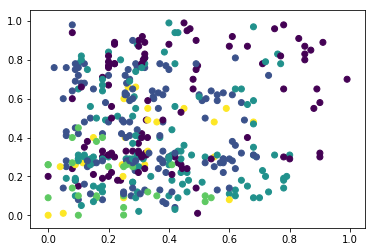

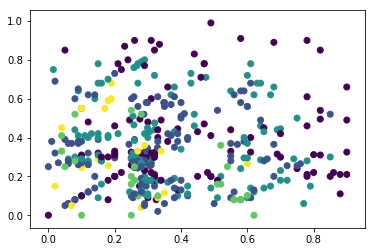

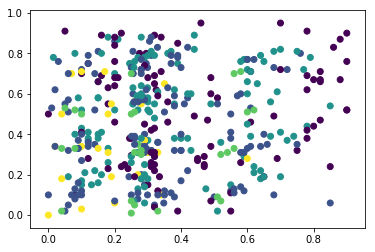

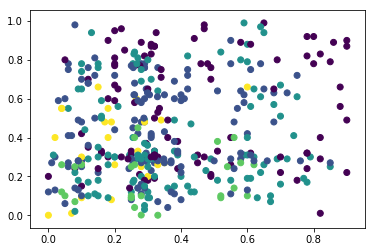

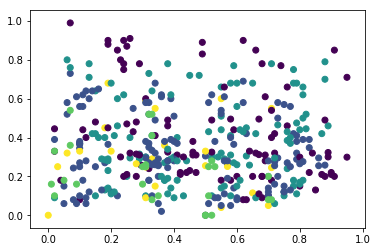

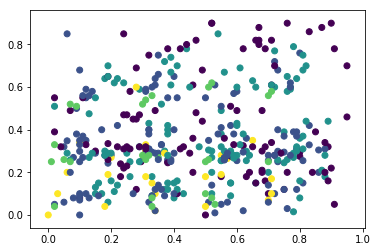

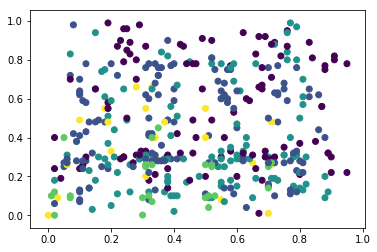

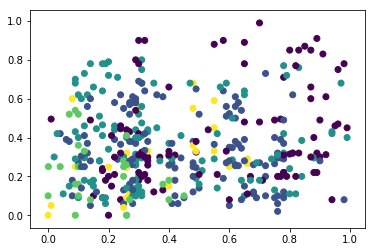

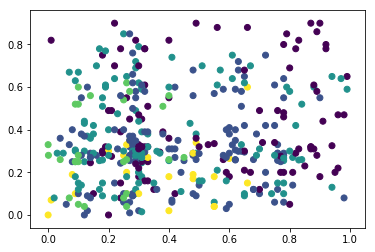

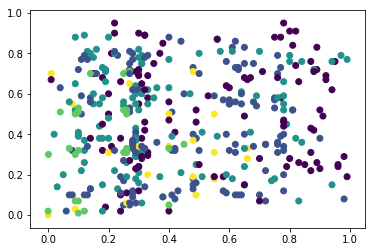

In [4]:
# plots inúteis =p
for i in range(4):
    for j in range(4):
        if i != j:
            fig, ax = plt.subplots()
            ax.scatter(data[i], data[j], c=data[5])
            plt.show()

In [5]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data.iloc[:,:5])

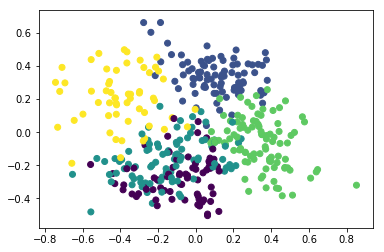

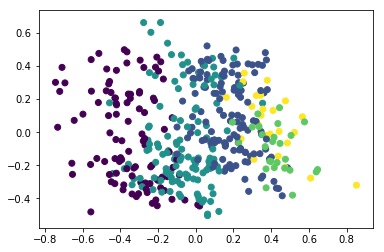

In [6]:
predictions = kmeans.predict(data.iloc[:,:5])

reduced_data = PCA(n_components=2).fit_transform(data.iloc[:,:5])

reduced_data_df = pd.DataFrame(reduced_data)
reduced_data_df[2] = predictions

# k-means clusters
fig, ax = plt.subplots()
ax.scatter(reduced_data_df[0], reduced_data_df[1], c=reduced_data_df[2])
plt.show()

# Original
fig, ax = plt.subplots()
ax.scatter(reduced_data_df[0], reduced_data_df[1], c=data[5])
plt.show()